#### Setup Graphviz

**Windows:**  
https://gitlab.com/api/v4/projects/4207231/packages/generic/graphviz-releases/9.0.0/windows_10_cmake_Release_graphviz-install-9.0.0-win64.exe  
```setx PATH "%PATH%;C:\Program Files\Graphviz\bin"```

**Linux:**  
``` bash
sudo apt install graphviz -y  
export PATH=/usr/bin/dot:$PATH
```

Documentação: https://diagrams.mingrammer.com/

In [1]:
%pip install diagrams

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


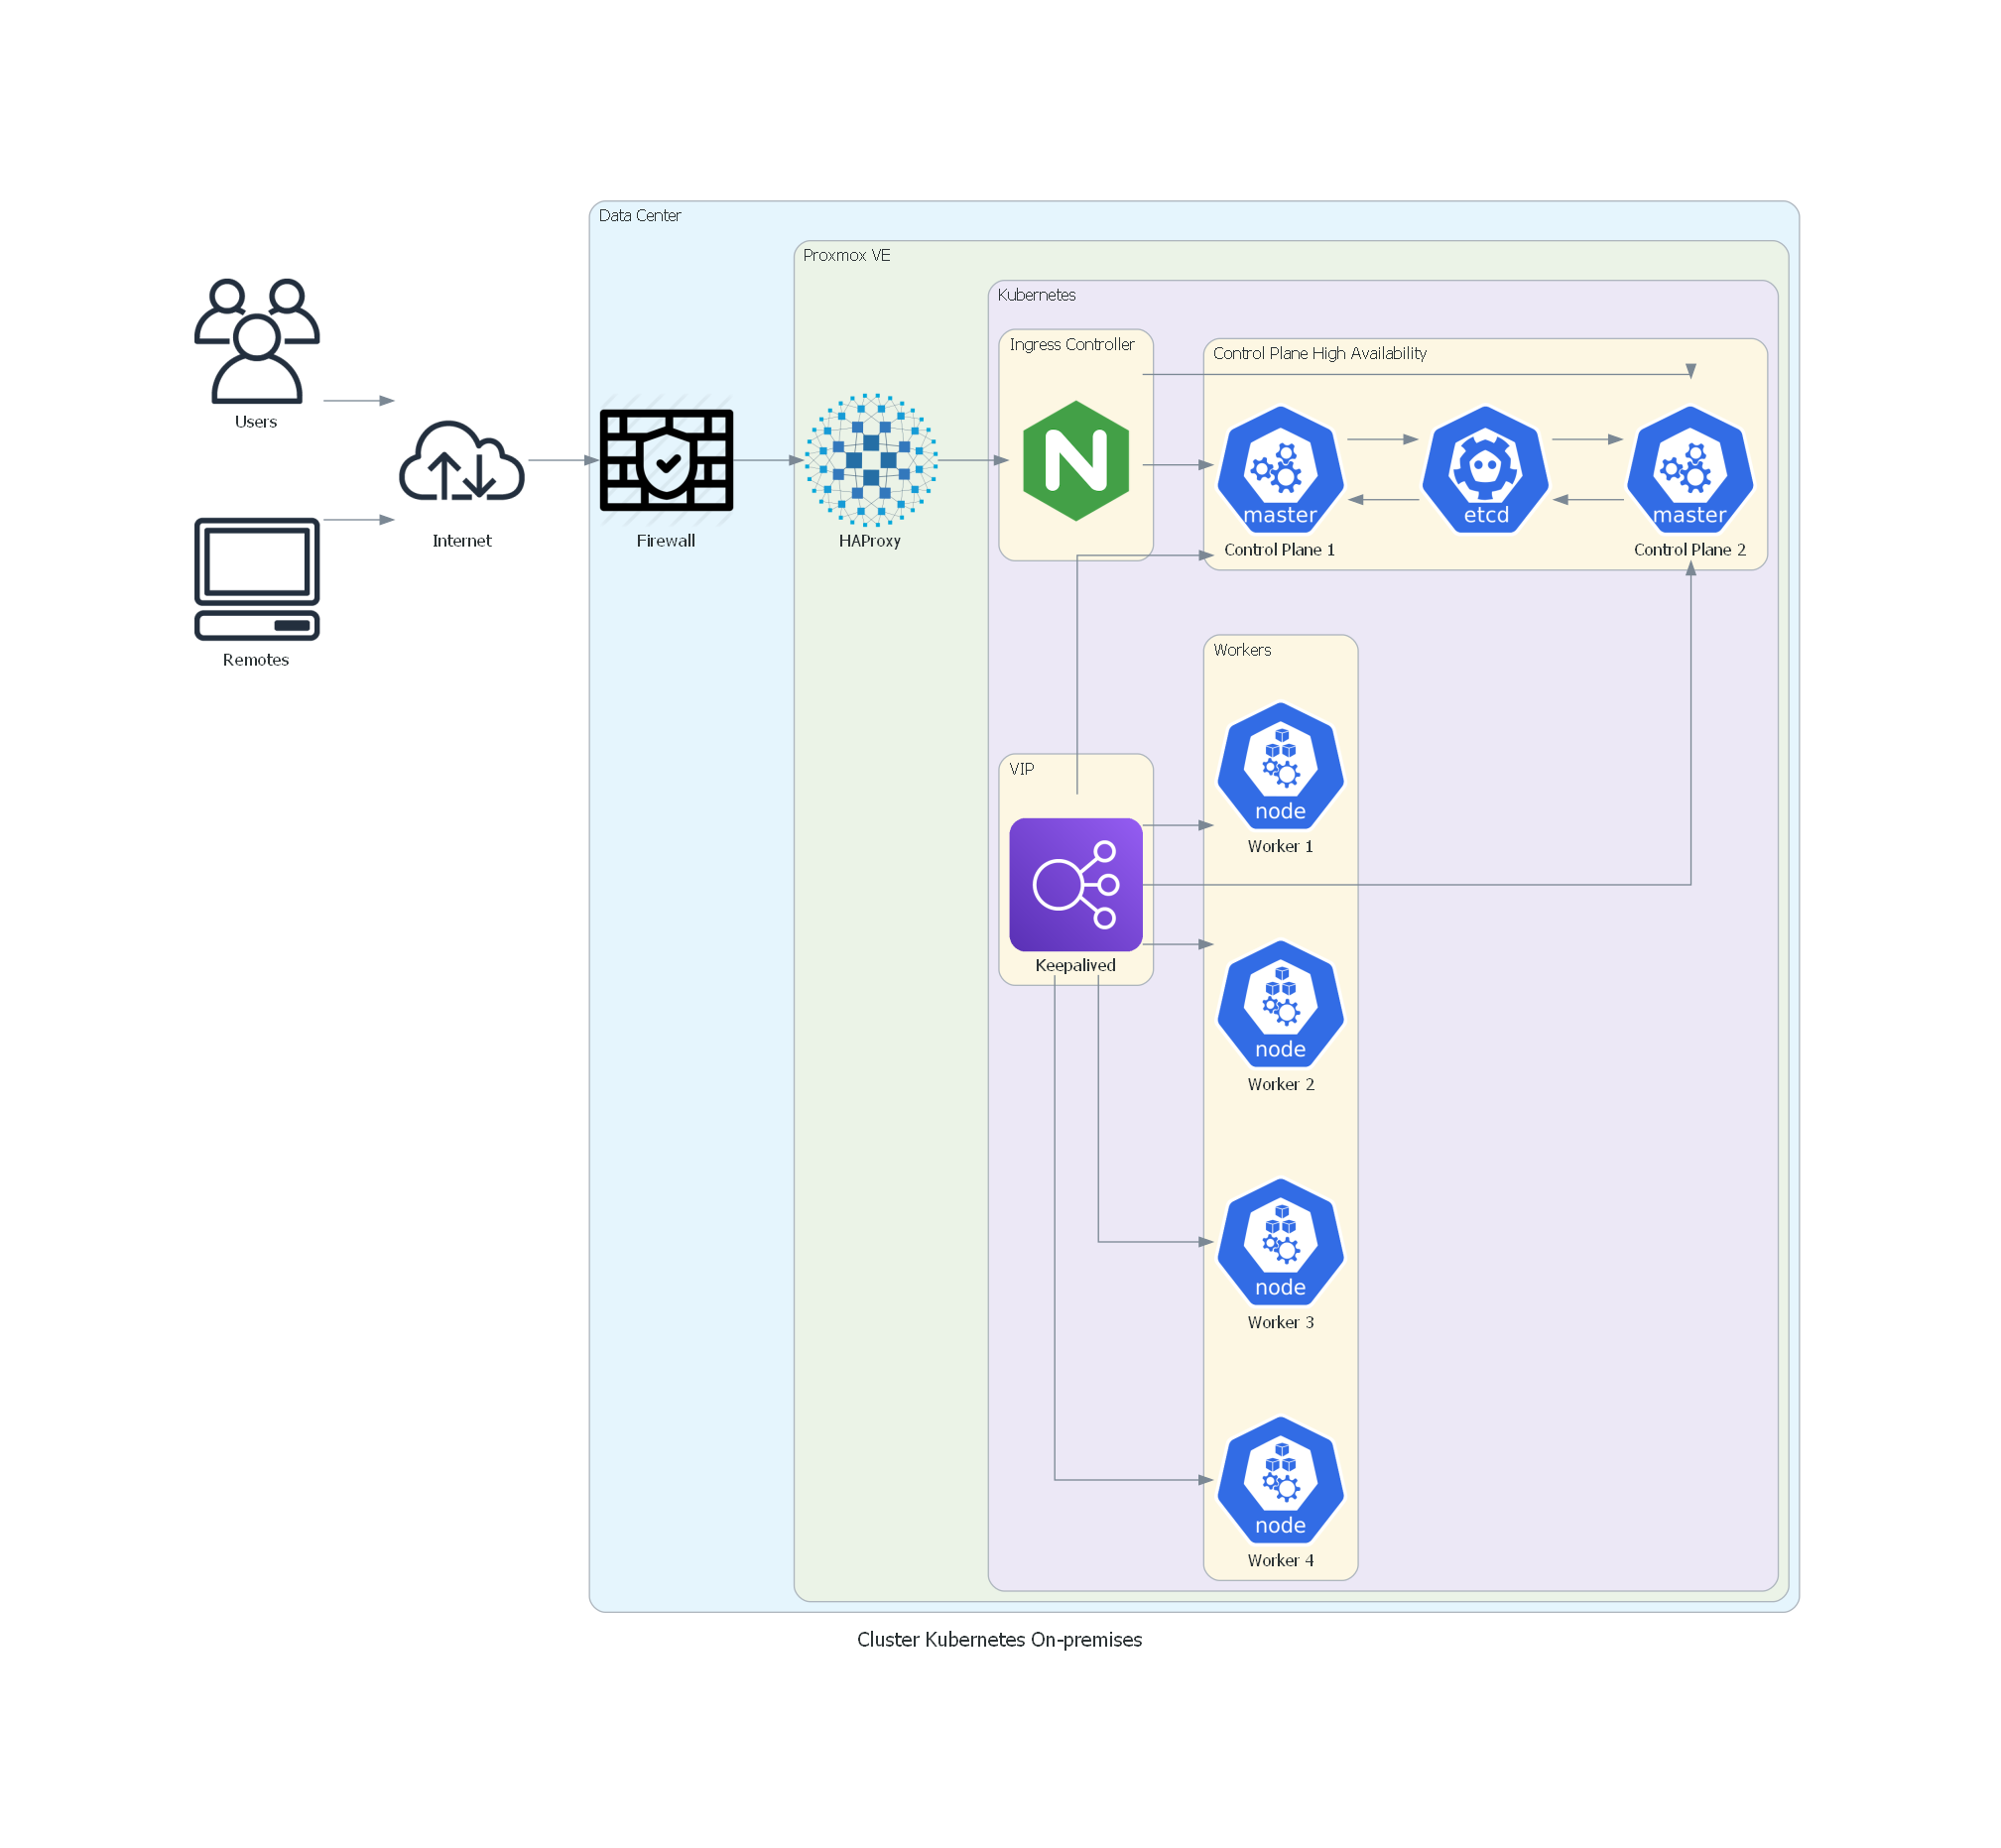

In [3]:
from diagrams import Cluster, Diagram, Node, Edge
from diagrams.onprem.network import Nginx
from diagrams.onprem.network import HAProxy
from diagrams.onprem.client import Users
from diagrams.onprem.client import Client
from diagrams.onprem.network import Internet
from diagrams.k8s.infra import Master
from diagrams.k8s.infra import ETCD
from diagrams.k8s.infra import Node
from diagrams.generic.network import Firewall
from diagrams.aws.network import ELB
import IPython.display as display

with Diagram("Cluster Kubernetes On-premises", show=False, filename="diagram", direction="LR"):
    internet = Internet("Internet")
    users = Users("Users")
    machine = Client("Remotes")

    with Cluster ("Data Center"):
        fw = Firewall("Firewall")

        with Cluster("Proxmox VE"):
            proxy = HAProxy("HAProxy")

            with Cluster("Kubernetes"):

                with Cluster("Ingress Controller"):
                    nginx= Nginx("")

                with Cluster("VIP"):
                    keepalived = ELB("Keepalived")

                with Cluster("Control Plane High Availability"):
                    control1 = Master("Control Plane 1")
                    control2 = Master("Control Plane 2")
                    etcd = ETCD("")

                with Cluster("Workers"):
                    worker1 = Node("Worker 1")
                    worker2 = Node("Worker 2")
                    worker3 = Node("Worker 3")
                    worker4 = Node("Worker 4")

    [users, machine] >> internet >> fw >> Edge(headport="c", tailport="c", minlen="1", lhead='cluster_Kubernetes') >> proxy
    proxy >> Edge(headport="c", tailport="c", minlen="1", lhead='cluster_Kubernetes') >> nginx
    nginx >> Edge(headport="c", tailport="c", minlen="1", lhead='Control Plane') >> control1
    nginx >> Edge(headport="c", tailport="c", minlen="1", lhead='Control Plane') >> control2

    keepalived >> [control1, control2]
    [control1, control2] >> etcd >> [control1, control2]
    keepalived >>  [worker1, worker2, worker3, worker4]

display.Image("diagram.png", width="100%", height=None)